# Data Initialization

In [1]:
# import libraries for data management
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

<Figure size 1296x432 with 0 Axes>

In [2]:
#load dataset

data = pd.read_csv('ECommerce_Cleansed.csv',index_col = 'CustomerID')

In [3]:
data.head()

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,Tenure_zscore,HourSpendOnApp_zscore,...,Debit Card,E wallet,Male,Fashion,Grocery,Laptop & Accessory,Mobile,Mobile Phone.1,Divorced,Married
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1,3,3,2,9,1,1.0,1.0,-0.74081,0.108090,...,1,0,0,0,0,1,0,0,0,0
50002,1,1,4,3,7,1,0.0,1.0,-0.03925,0.108090,...,0,0,1,0,0,0,1,0,0,0
50003,1,1,4,3,6,1,0.0,1.0,-0.03925,-1.307210,...,1,0,1,0,0,0,1,0,0,0
50004,1,3,4,5,8,0,0.0,1.0,-1.21963,-1.307210,...,1,0,1,0,0,1,0,0,0,0
50005,1,1,3,5,3,0,1.0,1.0,-1.21963,-0.325522,...,0,0,1,0,0,0,1,0,0,0


# Machine Learning (Decision Tree)

In [4]:
# import libraries for machine learning (decision tree)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

In [5]:
# X and Y split

X = data.drop(['Churn'],axis='columns',inplace=False)
Y = data['Churn']

In [6]:
# Test and Train Set Split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

### baseline

In [7]:
# Default Model (Baseline)

model = tree.DecisionTreeClassifier()
model = model.fit(train_x,train_y)
pred_y = model.predict(test_x)
pred_prob_y = model.predict_proba(test_x)

In [8]:
pred_prob_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [9]:
# Evaluation

print("MAE:",mean_absolute_error(test_y, pred_y))
print("Accuracy:",accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y))

MAE: 0.055654233274126705
Accuracy: 0.9443457667258733
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1414
           1       0.84      0.81      0.83       275

    accuracy                           0.94      1689
   macro avg       0.90      0.89      0.90      1689
weighted avg       0.94      0.94      0.94      1689

Confusion Matrix: 
 [[1372   42]
 [  52  223]]


### Overfitting Check

In [10]:
# check for overfitting (max_leaf_nodes)

nodes = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
error_train = []
error_test = []

for i in nodes:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_leaf_nodes = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at nodes:",nodes[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at nodes:",nodes[error_test.index(min(error_test))])

Training Set Min Error Rate: 1.421% at nodes: 200
Testing Set Error Rate: 6.039% at nodes: 170


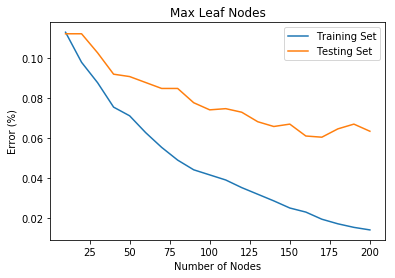

In [11]:
# range for cvgrid for leaf nodes is 150-170

plt.title('Max Leaf Nodes')
plt.plot(nodes,error_train, label='Training Set')
plt.plot(nodes,error_test, label='Testing Set')
plt.xlabel('Number of Nodes')
plt.ylabel('Error (%)')
plt.legend()

In [12]:
# check for overfitting (depth)

depths = [*range(1,21)]
error_train = []
error_test = []

for i in depths:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_depth = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at depths:",depths[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at depths:",depths[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at depths: 15
Testing Set Error Rate: 5.388% at depths: 18


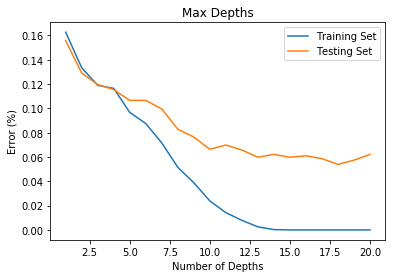

In [13]:
# range for cvgrid for max depths is 13-18 

plt.title('Max Depths')
plt.plot(depths,error_train, label='Training Set')
plt.plot(depths,error_test, label='Testing Set')
plt.xlabel('Number of Depths')
plt.ylabel('Error (%)')
plt.legend()

In [14]:
# check for overfitting (min sample split)

split = [*range(2,11)]
error_train = []
error_test = []

for i in split:
    # 70% train data
    model = tree.DecisionTreeClassifier(min_samples_split = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at samples:",split[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at samples:",split[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at samples: 2
Testing Set Error Rate: 5.802% at samples: 2


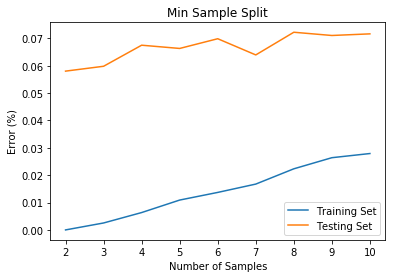

In [15]:
# range for cvgrid for min sample split is 2-4 

plt.title('Min Sample Split')
plt.plot(split,error_train, label='Training Set')
plt.plot(split,error_test, label='Testing Set')
plt.xlabel('Number of Samples')
plt.ylabel('Error (%)')
plt.legend()

### gridsearchcv

In [16]:
# define criterion

crit = ['gini','entropy']

# define max depths

depths = np.arange(13, 19)

# define max leaf nodes

num_leafs = [150,155,160,165,170]

# define the min sample split

split = [2,3,4]

# initiate grid

try_grid = [{'criterion':crit,
            'max_depth':depths,
            'max_leaf_nodes':num_leafs,
            'min_samples_split':split,
            }]

try_grid

[{'criterion': ['gini', 'entropy'],
  'max_depth': array([13, 14, 15, 16, 17, 18]),
  'max_leaf_nodes': [150, 155, 160, 165, 170],
  'min_samples_split': [2, 3, 4]}]

In [17]:
# DT_model = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy'), param_grid=try_grid, cv=10)

DT_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=try_grid, cv=10)

In [18]:
# fit the model with a combination of the parameters, this will take a while to run

DT_model.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([13, 14, 15, 16, 17, 18]),
                          'max_leaf_nodes': [150, 155, 160, 165, 170],
                          'min_samples_split': [2, 3, 4]}])

In [19]:
# find the best parameters

DT_model.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_leaf_nodes': 170,
 'min_samples_split': 2}

In [20]:
DT_model.best_score_

0.9248891601876246

In [21]:
# pick the best model

DT_model_best = tree.DecisionTreeClassifier(criterion = 'gini',
                                            max_depth = 17, 
                                            max_leaf_nodes = 170,
                                            min_samples_split = 2,
                                            )

DT_model_best.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=17, max_leaf_nodes=170)

In [22]:
pred_y_2 = DT_model_best.predict(test_x)
pred_prob_y_2 = DT_model_best.predict_proba(test_x)

## Evaluation

In [23]:
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2))
print("Accuracy:",accuracy_score(test_y, pred_y_2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y_2))

MAE: 0.0615748963883955
Accuracy: 0.9384251036116045
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1414
           1       0.87      0.73      0.79       275

    accuracy                           0.94      1689
   macro avg       0.91      0.85      0.88      1689
weighted avg       0.94      0.94      0.94      1689

Confusion Matrix: 
 [[1385   29]
 [  75  200]]


### Feature Importance Analysis - Decision Tree

In [24]:
text_representation = tree.export_text(DT_model_best)
print(text_representation)

|--- feature_7 <= -1.04
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 4.50
|   |   |   |--- feature_10 <= -0.86
|   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.08
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_11 >  0.08
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_26 >  0.50
|   |   |   |   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_12 <= -0.77
|   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|  

In [25]:
# Feature 7, 4, 12 are the most informative features according to the decision tree text representation.

print('The most informative features are {}, {} and {}'.format(train_x.columns[7], train_x.columns[4],train_x.columns[12]))

The most informative features are Tenure_zscore, Complain and CashbackAmount_zscore


### Precision-Recall Curve

In [26]:
# array the test_y

test_y_array = np.array(test_y)

In [27]:
# precision-recall curve

precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2, recall2, threshold2 = precision_recall_curve(test_y_array, pred_prob_y_2[:,1])

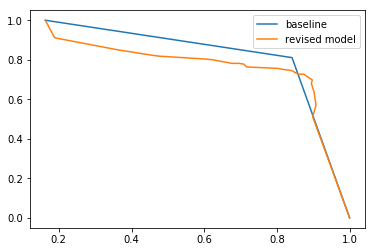

In [28]:
plt.plot(precision1,recall1, label='baseline') #baseline
plt.plot(precision2,recall2, label='revised model') #cvgrid new model
plt.legend()

### ROC / AUC Curve

In [29]:
# ROC

fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1],pos_label=1)
fpr2, tpr2, threshold4 = metrics.roc_curve(test_y_array, pred_prob_y_2[:,1],pos_label=1)

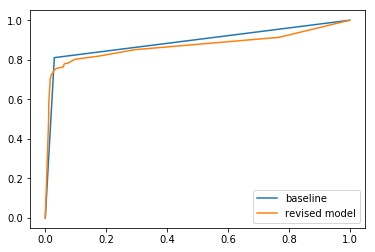

In [30]:
plt.plot(fpr1,tpr1, label='baseline') #baseline
plt.plot(fpr2,tpr2, label='revised model') #cvgrid new model
plt.legend()

In [31]:
# AUC - baseline

metrics.auc(fpr1, tpr1)

0.8906030603060306

In [32]:
# AUC - revised model

metrics.auc(fpr2, tpr2)

0.8706956409926707

### Cost Sensitive Analysis

In [33]:
# Cost function used: Cost= FP x (1) + FN x (25)

In [34]:
# converting the fpr, tpr, threshold arrays obtained previously to lists for easier manipulation

fpr2.tolist()
tpr2.tolist()
threshold4.tolist()

[2.0,
 1.0,
 0.96,
 0.9555555555555556,
 0.9552238805970149,
 0.95,
 0.9375,
 0.9285714285714286,
 0.3333333333333333,
 0.125,
 0.11764705882352941,
 0.1,
 0.08421052631578947,
 0.06451612903225806,
 0.0625,
 0.05263157894736842,
 0.0425531914893617,
 0.041666666666666664,
 0.036101083032490974,
 0.03225806451612903,
 0.02247191011235955,
 0.014603616133518776,
 0.011111111111111112,
 0.0]

In [35]:
# calculate the cost for each thresholds and compile them into a list 

costlist2=[]
fnr2=[]
for fpr,tpr,thres in zip(fpr2[1:], tpr2[1:], threshold4[1:]):
    fnr=1-tpr
    fnr2.append(fnr)
    cost=((fpr*(1414)*1)+(fnr*275*25))
    costlist2.append(cost)

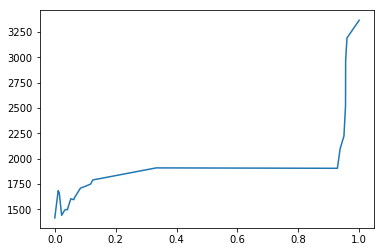

In [36]:
# plot the cost curve

plt.plot(threshold4[1:],costlist2, label='baseline')

In [37]:
# find the minimum cost from the cost curve and its corresponding threshold

newlist=[]
for m, n in zip(threshold4[1:],costlist2):
    newlist.append([m,n])
a,b=newlist[costlist2.index(min(costlist2))]
print("The best performing threshold is",a,"with a minimum cost of",b,".")

The best performing threshold is 0.0 with a minimum cost of 1414.0 .
